In [2]:
import numpy as np

In [6]:
import os
path=os.path.abspath('.')
print(path)
import pandas as pd

D:\学习材料\数学\数学建模与实验\美赛\美赛进行时\2023\2023_MCM-ICM_Problems


In [4]:

os.chdir("D:\学习材料\数学\数学建模与实验\美赛\美赛进行时\\2023\\2023_MCM-ICM_Problems")

In [8]:
file = 'Problem_C_Data_Wordle.xlsx'

data=pd.ExcelFile(file)
print(data.sheet_names)

['Sheet1']


In [9]:
df_sheet=pd.read_excel(file,sheet_name="Sheet1")

In [10]:
print(df_sheet)

          Date  Contest number   Word  Number of  reported results  \
0   2022-12-31             560  manly                        20380   
1   2022-12-30             559  molar                        21204   
2   2022-12-29             558  havoc                        20001   
3   2022-12-28             557  impel                        20160   
4   2022-12-27             556  condo                        20879   
..         ...             ...    ...                          ...   
354 2022-01-11             206  drink                       153880   
355 2022-01-10             205  query                       107134   
356 2022-01-09             204  gorge                        91477   
357 2022-01-08             203  crank                       101503   
358 2022-01-07             202  slump                        80630   

     Number in hard mode  1 try  2 tries  3 tries  4 tries  5 tries  6 tries  \
0                   1899      0        2       17       37       29       12   

In [10]:
df_sheet=pd.read_excel(file,sheet_name="Sheet1")
print(df_sheet)

          Date  Contest number   Word  Number of  reported results  \
0   2022-12-31             560  manly                        20380   
1   2022-12-30             559  molar                        21204   
2   2022-12-29             558  havoc                        20001   
3   2022-12-28             557  impel                        20160   
4   2022-12-27             556  condo                        20879   
..         ...             ...    ...                          ...   
354 2022-01-11             206  drink                       153880   
355 2022-01-10             205  query                       107134   
356 2022-01-09             204  gorge                        91477   
357 2022-01-08             203  crank                       101503   
358 2022-01-07             202  slump                        80630   

     Number in hard mode  1 try  2 tries  3 tries  4 tries  5 tries  6 tries  \
0                   1899      0        2       17       37       29       12   

In [11]:
number=df_sheet['Date']

In [12]:
result_number=df_sheet["Number of  reported results"]

In [13]:
result_number

0       20380
1       21204
2       20001
3       20160
4       20879
        ...  
354    153880
355    107134
356     91477
357    101503
358     80630
Name: Number of  reported results, Length: 359, dtype: int64

In [14]:
result_number=result_number.tolist()

In [15]:
result_number.reverse()

In [16]:
result_number

[80630,
 101503,
 91477,
 107134,
 153880,
 137586,
 132726,
 169484,
 205880,
 209609,
 222197,
 220950,
 280622,
 243964,
 273727,
 241489,
 269929,
 258038,
 276404,
 302348,
 331844,
 296968,
 313220,
 294687,
 341314,
 351663,
 361908,
 358176,
 359679,
 319698,
 311018,
 288228,
 336236,
 305372,
 304830,
 278826,
 269885,
 277471,
 261521,
 287836,
 289721,
 342003,
 265238,
 282327,
 273306,
 278731,
 306356,
 277576,
 250674,
 255907,
 248363,
 250413,
 251094,
 240137,
 257304,
 240018,
 203730,
 229895,
 218595,
 218595,
 207473,
 201799,
 208884,
 226349,
 192049,
 179436,
 185406,
 202855,
 217856,
 169071,
 179830,
 156311,
 154987,
 173636,
 160161,
 156785,
 169066,
 150197,
 149507,
 165468,
 173696,
 149070,
 158139,
 135219,
 144648,
 155079,
 124532,
 129651,
 121356,
 117856,
 117761,
 141158,
 134210,
 126241,
 109828,
 114907,
 123255,
 113448,
 129991,
 107987,
 106681,
 112383,
 108899,
 102007,
 97955,
 119232,
 95562,
 97452,
 91548,
 103153,
 98967,
 88974,


In [17]:
import matplotlib.pyplot as plt

In [34]:
time=number.tolist().reverse()

In [24]:
number

0     2022-12-31
1     2022-12-30
2     2022-12-29
3     2022-12-28
4     2022-12-27
         ...    
354   2022-01-11
355   2022-01-10
356   2022-01-09
357   2022-01-08
358   2022-01-07
Name: Date, Length: 359, dtype: datetime64[ns]

In [25]:
time=number.tolist()

In [28]:
time=[number.values]

In [30]:
number[1]

Timestamp('2022-12-30 00:00:00')

In [18]:
time=pd.date_range("20220107","20221231").strftime("%Y-%m-%d").tolist()

In [19]:
len(time)

359

Text(0.5, 1.0, 'origin')

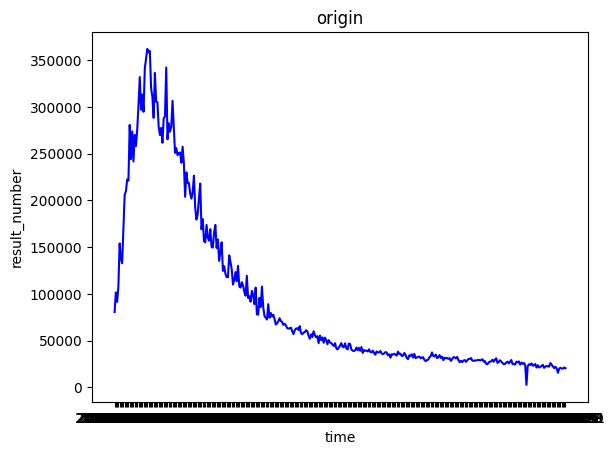

In [20]:
plt.plot(time,result_number,'-b')
plt.xlabel("time")
plt.ylabel("result_number")
plt.title("origin")
#画原始图像

原始生成图片（结果数量随时间变化）

In [36]:
import statsmodels.tsa.stattools as ts

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.stats.diagnostic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#数据平稳性检测 因为只有平稳数据才能做时间序列分析
def judge_stationarity(data_sanya_one):
    dftest = ts.adfuller(data_sanya_one)
    print(dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    stationarity = 1
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        if dftest[0] > value:
                stationarity = 0
    print(dfoutput)
    print("是否平稳(1/0): %d" %(stationarity))
    return stationarity
stationarity = judge_stationarity(result_number)

(-3.8116209100267127, 0.0027906308163251434, 17, 341, {'1%': -3.449673193310592, '5%': -2.8700533746644323, '10%': -2.5713055939491403}, 7304.337951933528)
Test Statistic                  -3.811621
p-value                          0.002791
#Lags Used                      17.000000
Number of Observations Used    341.000000
Critical Value (1%)             -3.449673
Critical Value (5%)             -2.870053
Critical Value (10%)            -2.571306
dtype: float64
是否平稳(1/0): 1


平稳性检测

In [21]:
result_data=pd.Series(result_number)

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

d:\pythonproject\new\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5468\3935156670.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(data.values, ax[2], lags=lags).show()


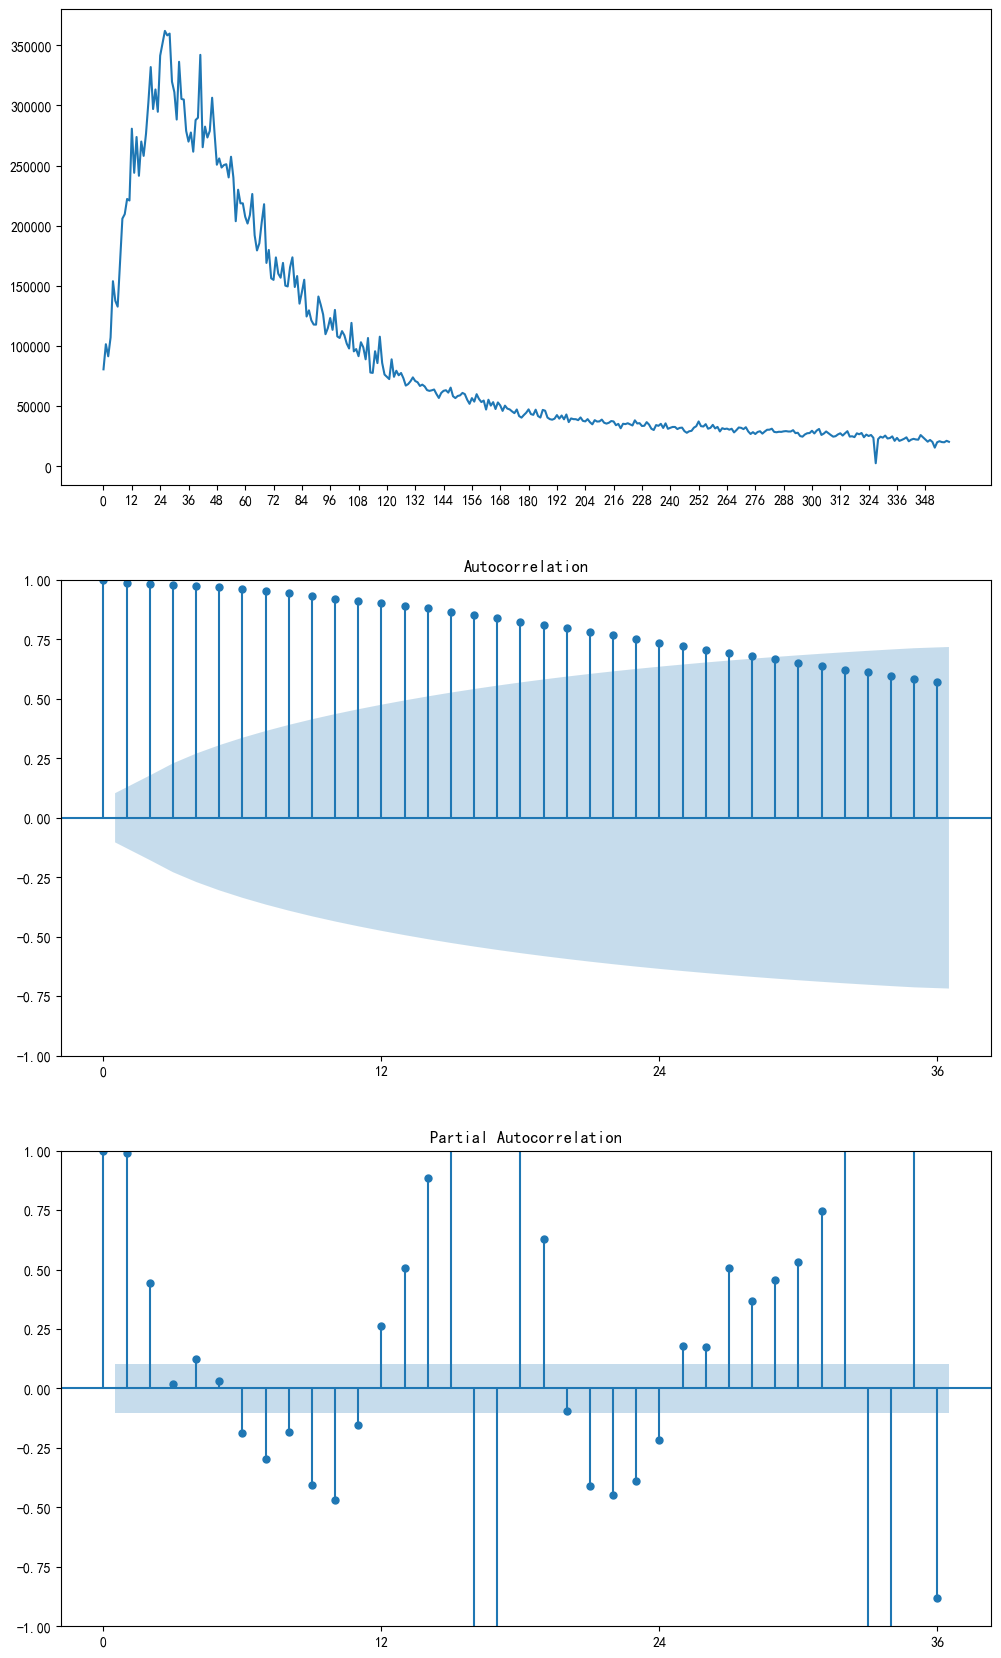

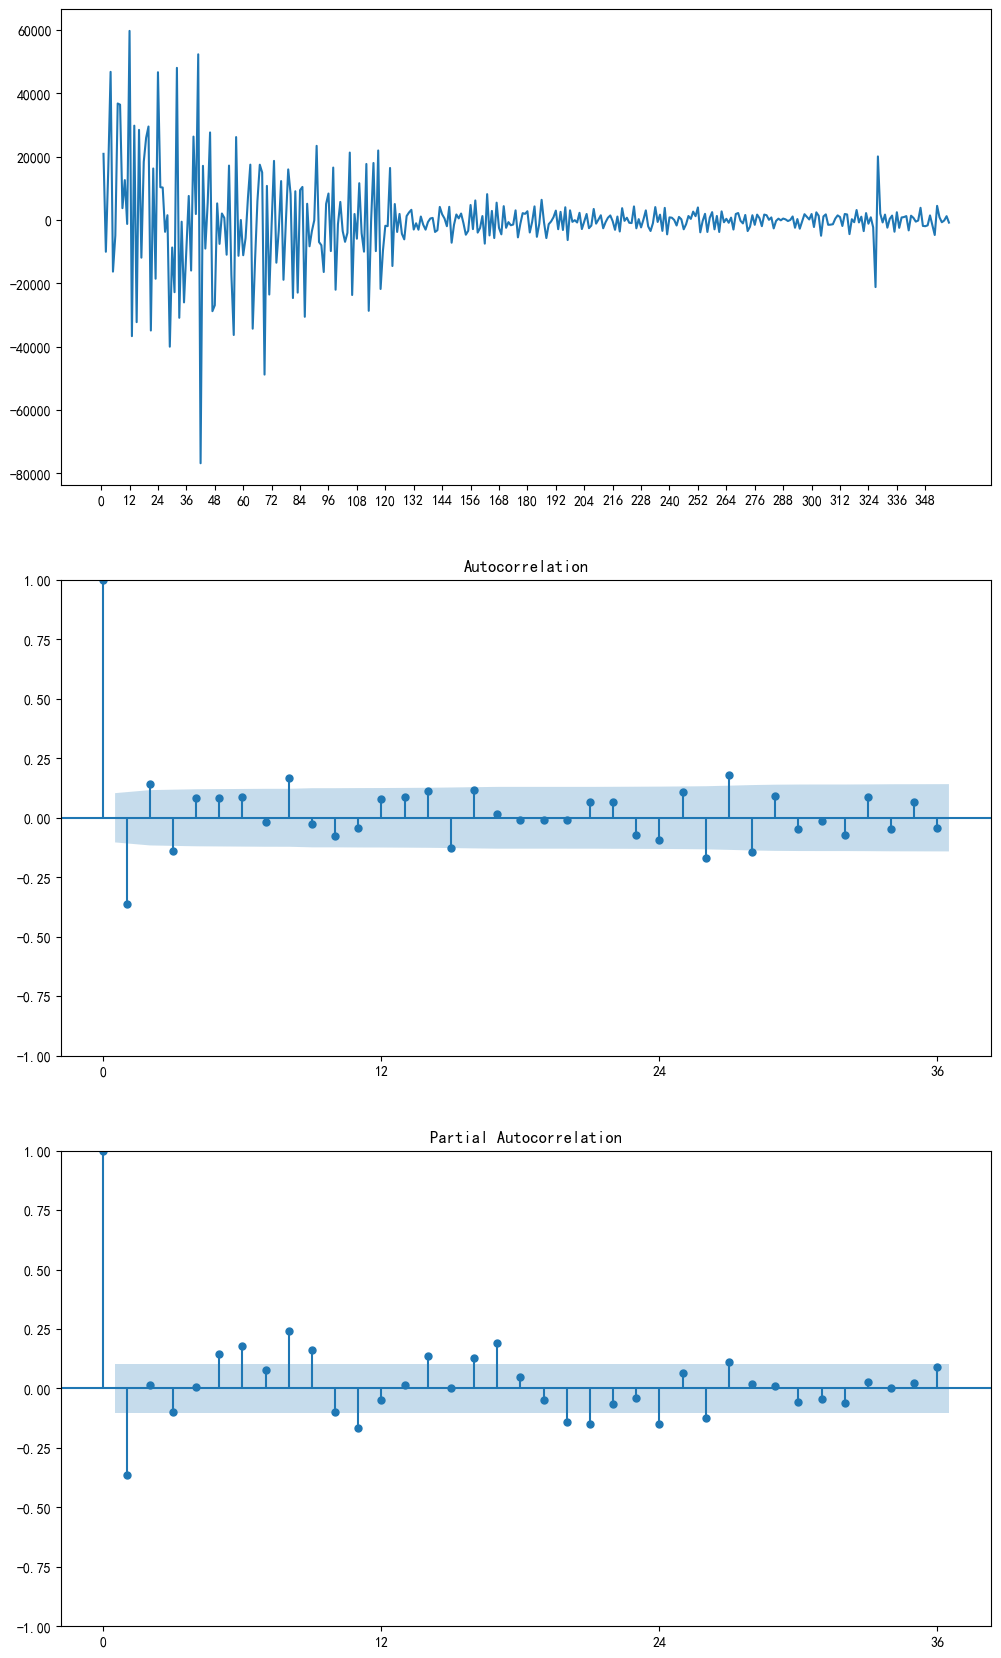

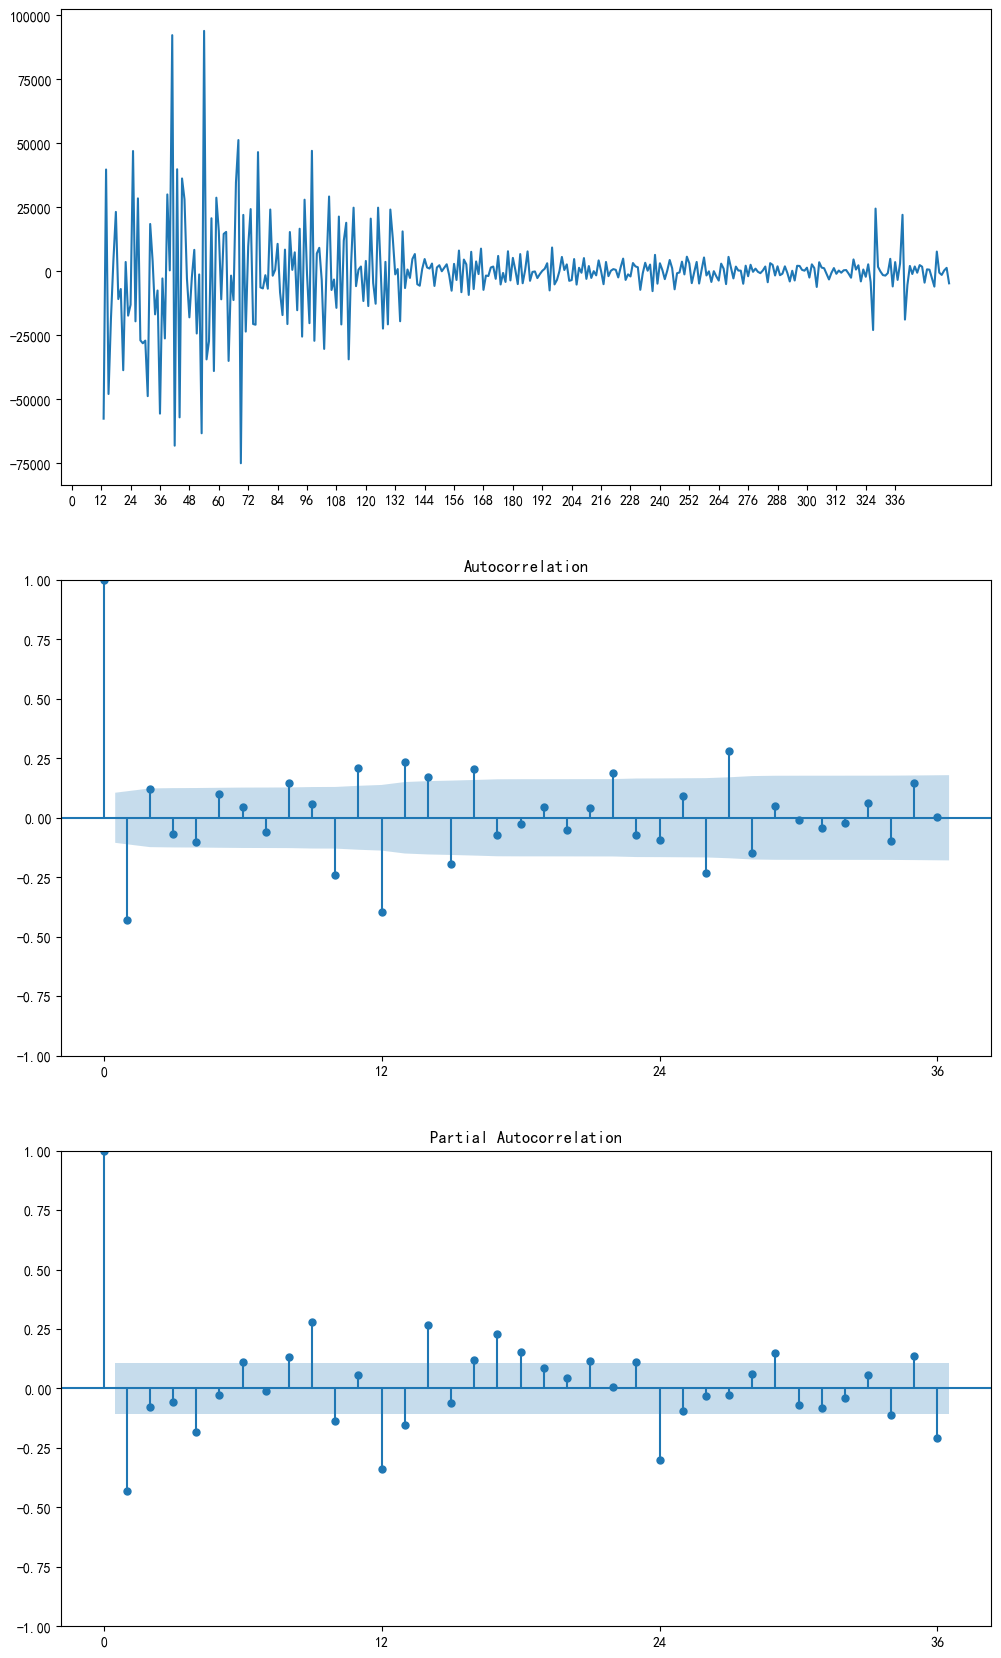

In [23]:
def myplot(data:pd.DataFrame, i:int):
    # data: pd.DataFrame
    # i: 代表第几个图
    fig, ax = plt.subplots(3, 1, num=i, figsize=(12, 21))
    ax[0].plot(data)
    lags = 2 * int(np.sqrt(len(data)))
    plot_acf(data.values, ax[1], lags=lags)
    plot_pacf(data.values, ax[2], lags=lags).show()
    for i,_ in enumerate(ax):
        if i == 0:
            ax[i].set_xticks(list(range(0, len(data), 12)))
        else:
            ax[i].set_xticks(list(range(0, lags+12, 12)))

diff_1 = result_data.diff(1).dropna() #一阶差分
no_season = diff_1.diff(12).dropna() # 在一阶差分的基础上进行12阶差分
diff_2 = diff_1.diff(1).dropna() # 二阶差分
# 分别画图
myplot(result_data, 1)
myplot(diff_1, 2)
myplot(no_season, 3)

时序图、自相关图、偏相关图（不懂意义，查查）

d:\pythonproject\new\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5468\3935156670.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(data.values, ax[2], lags=lags).show()


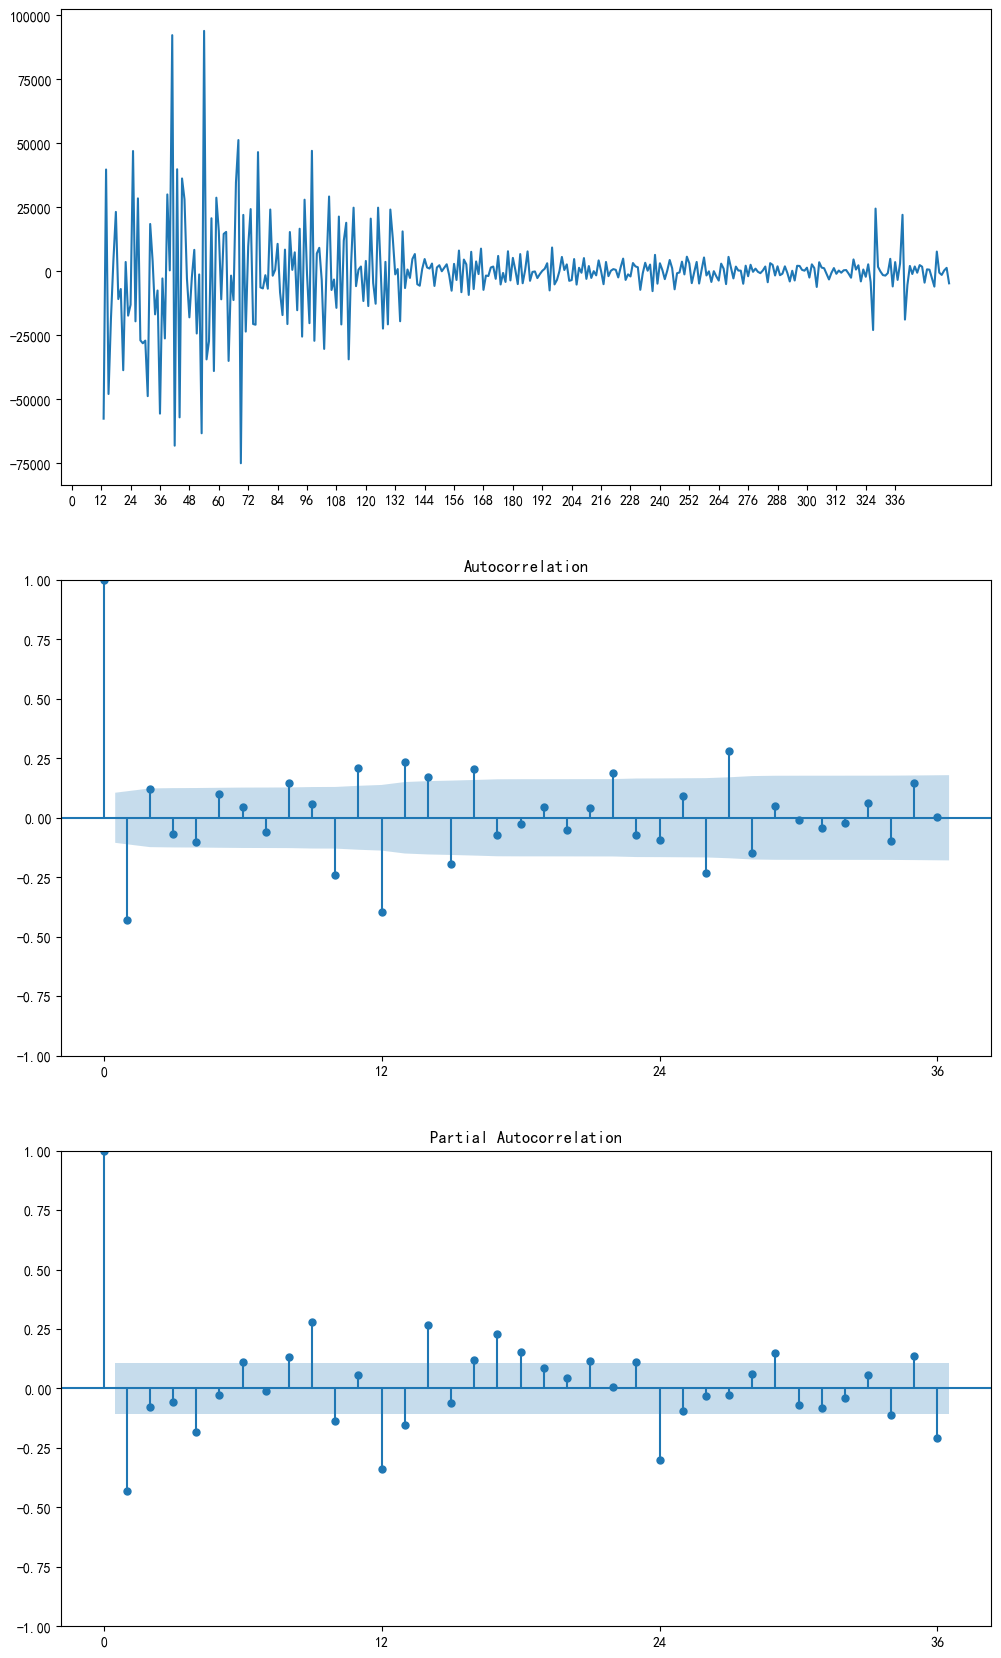

In [24]:
def eliminate_trend_season(data, method):
    """
    method:
    "pure_diff": 1阶12步差分
    "poly_diff": 多项式拟合，使用12步差分消除季节项
    "min_trend_diff": 最小趋势法去除趋势项与季节项，再在此基础上进行12步差分
    }

    传入的必须是一列数据，之后只需检查是数组，还是DataFrame
    """
    if not isinstance(data, pd.DataFrame):
        # data = np.array(data)
        data = pd.DataFrame(data)
    if method == "pure_diff":
        no_trend = data.diff(1).dropna()
        no_season = no_trend.diff(12).dropna()
        return no_season
    elif method == "poly_diff":
        # 输入的x与y
        x = list(range(len(data)))
        d_val = data.values.flatten()
        # 多项式拟合
        zzz = np.polyfit(x, d_val, 9)
        p4 = np.poly1d(zzz)
        c = p4(x)
        # 减去趋势项（多项式拟合的曲线）
        no_trend = d_val - c
        # 进行12步差分，消除季节项
        if isinstance(no_trend, pd.DataFrame):
            no_season = no_trend.diff(12).dropna()
        else:
            no_trend = pd.DataFrame(no_trend)
            no_season = no_trend.diff(12).dropna()
        return no_season
    else:
        raise "please input a true method!!"
no_season = eliminate_trend_season(result_data, method="pure_diff")
myplot(no_season, 1)

去除季节性

In [25]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(no_season)
print(u'一阶12步差分序列的平稳性检验\n', result)
# 第二个数是e-13，这远小于0.01，所以拒绝原假设，认为时间序列是平稳的//算比较接近吧

一阶12步差分序列的平稳性检验
 (-3.4279893549098728, 0.010040927537676369, 17, 328, {'1%': -3.4504451681828194, '5%': -2.870392380216117, '10%': -2.571486353732897}, 7077.532586634707)


很平稳

In [26]:
#白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'一阶12步序列的白噪声检验结果为：\n', acorr_ljungbox(result_data.diff(1).dropna().diff(12).dropna(), lags=6)) #返回统计量和p值

一阶12步序列的白噪声检验结果为：
      lb_stat     lb_pvalue
1  64.928713  7.765722e-16
2  70.185373  5.746982e-16
3  71.816022  1.743113e-15
4  75.587282  1.496893e-15
5  79.109322  1.288701e-15
6  79.846282  3.843858e-15


In [27]:
# ===========生成参数对，寻找最优SARIMAX()()参数===========
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook
ps = range(0, 1)
d = range(0, 2)
qs = range(0, 7)
# 季节项相关的参数
Ps = range(0, 1)
D = range(1, 2)
Qs = range(1, 2)
params_list = list(product(ps, d, qs, Ps, D, Qs))
print(params_list)

from statsmodels.tsa.arima_model import ARIMA
import warnings
# 忽视在模型拟合中遇到的错误
warnings.filterwarnings("ignore")
# 找最优的参数 SARIMAX
def best_params(data:np.array, params_list):
    result = []
    best_bic = 100000
    for param in tqdm_notebook(params_list):
        # 模型拟合
        model = SARIMAX(data, order=(param[0], param[1], param[2]), seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
        bic_model = model.bic # 拟合出模型的BIC值
        # 寻找最优的参数
        if bic_model < best_bic:
            best_mode = model
            best_bic = bic_model
            best_param = param
        param_1 = (param[0], param[1], param[2])
        param_2 = (param[3], param[4], param[5], 7)
        param = 'SARIMA  {0} and {1}'.format(param_1, param_2)
        print(param)
        result.append([param, model.bic])

    result_list = pd.DataFrame(result)
    result.columns = ['parameters', 'bic']
    result_list = result_list.sort_values(by='bic',ascending=True).reset_index(drop=True)
    return result_list


result_table = best_params(result_data, params_list)
print(result_table)

[(0, 0, 0, 0, 1, 1), (0, 0, 1, 0, 1, 1), (0, 0, 2, 0, 1, 1), (0, 0, 3, 0, 1, 1), (0, 0, 4, 0, 1, 1), (0, 0, 5, 0, 1, 1), (0, 0, 6, 0, 1, 1), (0, 1, 0, 0, 1, 1), (0, 1, 1, 0, 1, 1), (0, 1, 2, 0, 1, 1), (0, 1, 3, 0, 1, 1), (0, 1, 4, 0, 1, 1), (0, 1, 5, 0, 1, 1), (0, 1, 6, 0, 1, 1)]


  0%|          | 0/14 [00:00<?, ?it/s]

SARIMA(0, 0, 0)x(0, 1, 1, 7)
SARIMA(0, 0, 1)x(0, 1, 1, 7)
SARIMA(0, 0, 2)x(0, 1, 1, 7)
SARIMA(0, 0, 3)x(0, 1, 1, 7)
SARIMA(0, 0, 4)x(0, 1, 1, 7)
SARIMA(0, 0, 5)x(0, 1, 1, 7)
SARIMA(0, 0, 6)x(0, 1, 1, 7)
SARIMA(0, 1, 0)x(0, 1, 1, 7)
SARIMA(0, 1, 1)x(0, 1, 1, 7)
SARIMA(0, 1, 2)x(0, 1, 1, 7)
SARIMA(0, 1, 3)x(0, 1, 1, 7)
SARIMA(0, 1, 4)x(0, 1, 1, 7)
SARIMA(0, 1, 5)x(0, 1, 1, 7)
SARIMA(0, 1, 6)x(0, 1, 1, 7)
                      parameters          bic
0   SARIMA(0, 1, 6)x(0, 1, 1, 7)  7636.769085
1   SARIMA(0, 1, 5)x(0, 1, 1, 7)  7648.309575
2   SARIMA(0, 1, 2)x(0, 1, 1, 7)  7664.713425
3   SARIMA(0, 1, 4)x(0, 1, 1, 7)  7667.487126
4   SARIMA(0, 1, 1)x(0, 1, 1, 7)  7669.183400
5   SARIMA(0, 1, 0)x(0, 1, 1, 7)  7682.813490
6   SARIMA(0, 1, 3)x(0, 1, 1, 7)  7685.102780
7   SARIMA(0, 0, 6)x(0, 1, 1, 7)  7724.427142
8   SARIMA(0, 0, 5)x(0, 1, 1, 7)  7817.902586
9   SARIMA(0, 0, 4)x(0, 1, 1, 7)  7874.839392
10  SARIMA(0, 0, 3)x(0, 1, 1, 7)  7898.670491
11  SARIMA(0, 0, 2)x(0, 1, 1, 7)  7914.361

In [88]:
result_data

0       80630
1      101503
2       91477
3      107134
4      153880
        ...  
354     20879
355     20160
356     20001
357     21204
358     20380
Length: 359, dtype: int64

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  359
Model:             SARIMAX(0, 1, 6)x(0, 1, [1], 7)   Log Likelihood               -3794.941
Date:                             Mon, 20 Feb 2023   AIC                           7605.883
Time:                                     11:47:00   BIC                           7636.769
Sample:                                          0   HQIC                          7618.175
                                             - 359                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4315      0.040    -10.861      0.000      -0.509      -0.354
ma.L2          0.0695      0.053      1.318      0.188      -0.034       0.173
ma.L3         -0.1415      0.045     -3.138      0.002      -0.230      -0.053
ma.L4          0.1942      0.048      4.017      0.000       0.099       0.289
ma.L5          0.1720      0.053      3.270      0.001       0.069       0.275
ma.L6          0.0823      0.043      1.921      0.055      -0.002       0.166
ma.S.L7       -0.9283      0.047    -19.811      0.000      -1.020      -0.836
sigma2      1.737e+08   2.03e-10   8.55e+17      0.000    1.74e+08    1.74e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):              1282.14
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.16e+32. Standard errors may be unstable.
"""

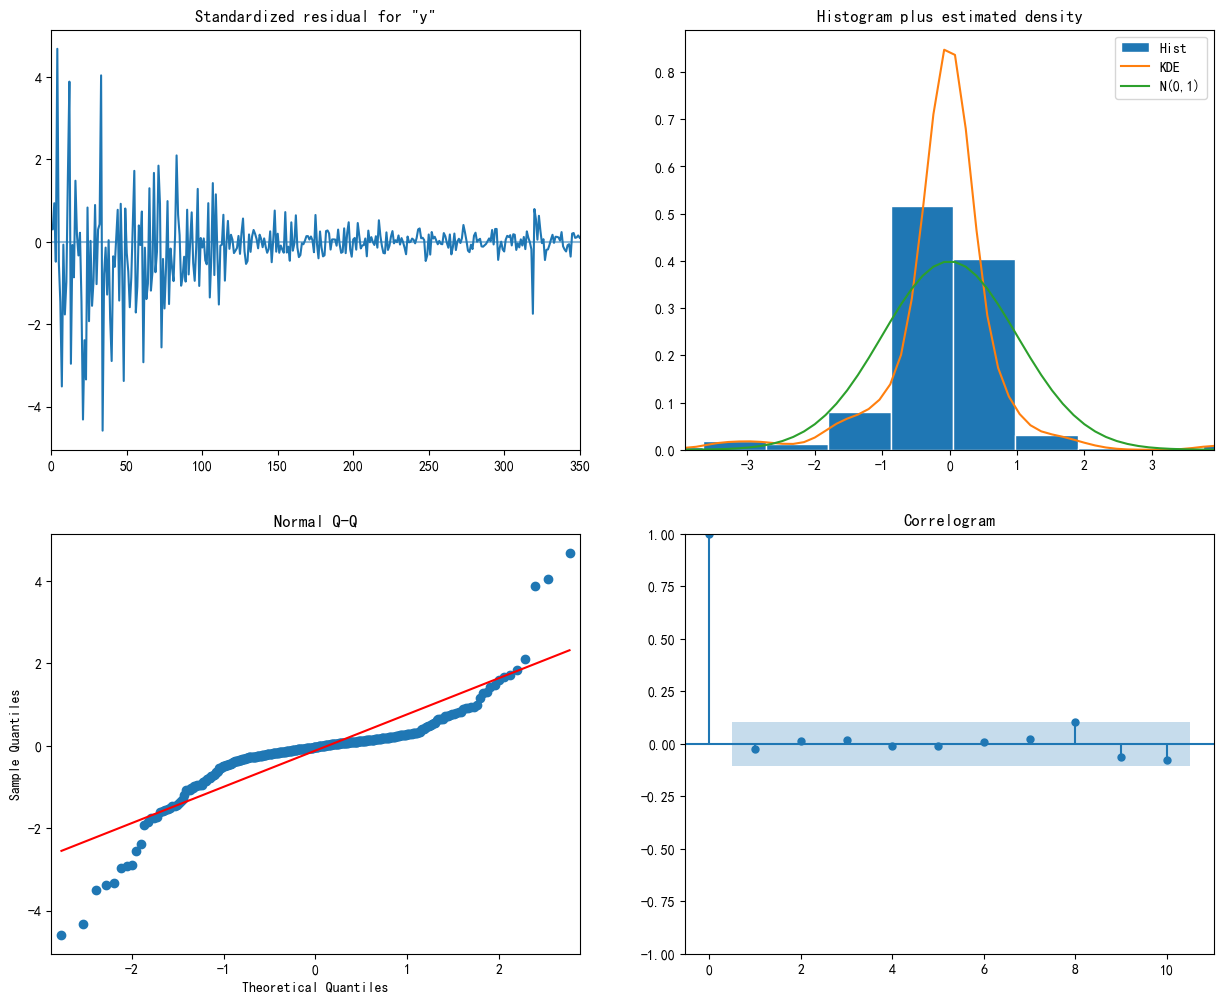

In [28]:
# ================使用上一步模型进行定阶拟合================
ma1 = SARIMAX(result_data, order=(0, 1, 6), seasonal_order=(0, 1, 1,7 )).fit(disp=-1)
resid = ma1.resid
fig = ma1.plot_diagnostics(figsize=(15, 12))
# fig.savefig(r'.\test.png')
# 输出模型拟合的系数，以及一切相关信息
ma1.summary()

1、时序图-------主观判断是否是有趋势或者季节项。
2、直方图-------拟合曲线看是否是正态分布的形状。
3、QQ图-------看是否在一条直线上。
4、自相关图检验-------除了在lags=0的时候，在95%的置信区间之外，其他都在置信区间里面。
通过这四张图来说明拟合程度较好

In [29]:
predict_date=pd.date_range("20220107","20230302").strftime("%Y-%m-%d").tolist()

In [30]:
len(predict_date)

420

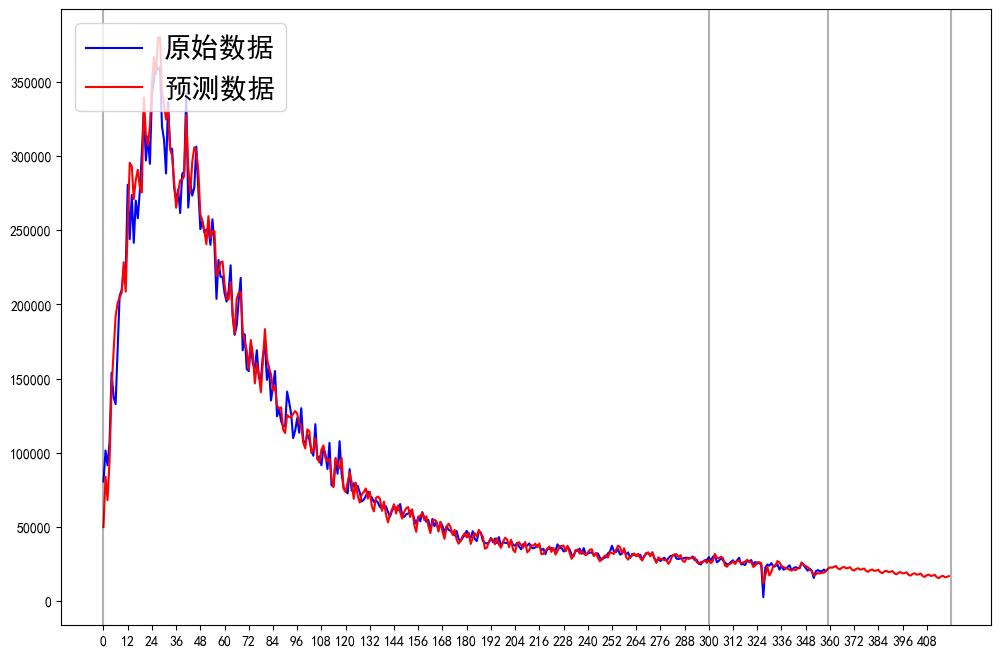

In [32]:

# 进行预测
data_predict = ma1.predict(1, 420)
# print(data_predict[-11:]) # 输出最后的数据
plt.figure(figsize=(12, 8))
oral_line, = plt.plot(result_number, color="b", label="原始数据")
x = list(range(len(data_predict)))
predict_line, = plt.plot(x, data_predict, color='r', label="预测数据")

# 预测数据进行填充
#plt.fill_betweenx(np.arange(0.0, 2, 0.01), 359, 390, color='yellow', alpha=0.3)
#yellow_patch = mpatches.Patch(color="yellow")
#plt.legend(fontsize=20, loc='upper left')
handles=[oral_line, predict_line]
labels=["原始数据", "预测数据"]
plt.legend(handles, labels, fontsize=20, loc='upper left')

# 画竖线，方便看
axvline_li = [0,300, 359, 420]
for i in axvline_li:
    plt.axvline(i, color='k', alpha=0.3)
plt.xticks(list(range(0, len(data_predict), 12)))
plt.show()

结果

In [33]:
predict_March_1=data_predict[420]

In [34]:
predict_March_1

16854.200060080555

In [36]:
residuals=ma1.resid
np.std(residuals)

13883.579317580654

输出预测区间
预测区间用模型的残差序列的标准差来估计预测值的误差
值为16854.200060080555±13883.579317580654
置信区间为5%,即有95%的自信预测值在输出的预测区间之中

In [118]:

fact_10 = result_number[-60:]
predict_10 = data_predict[-60:]
mean = np.mean(fact_10)
std = np.std(fact_10)
fact_10=(fact_10-mean)/std
mean = np.mean(predict_10)
std = np.std(predict_10)
predict_10=(predict_10-mean)/std
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.metrics import mean_absolute_error # 平方绝对误差
from sklearn.metrics import r2_score # R square
mse = mean_squared_error(predict_10, fact_10)
mae = mean_absolute_error(predict_10, fact_10)
r2s = r2_score(predict_10, fact_10)
print('MSE: ', mse, '\n', 'MAE: ', mae, '\n', 'R square: ', r2s)

MSE:  0.8109272659382227 
 MAE:  0.5585600824296456 
 R square:  0.18907273406177738


模型指标

In [ ]:
#把十二月份的数据隐藏，重新预测


In [74]:
#相关性热力图的绘制
import seaborn as sns
path=os.path.abspath('.')
print(path)
cor_df=pd.read_excel('第一问相关性.xlsx',index_col=0)


D:\学习材料\数学\数学建模与实验\美赛\美赛进行时\2023\2023_MCM-ICM_Problems


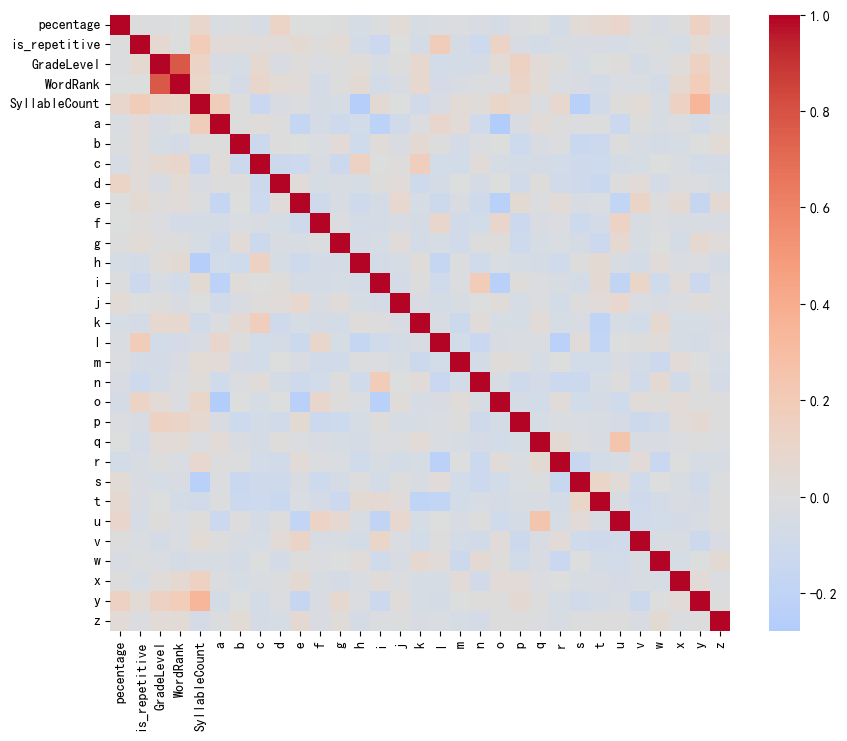

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cor_df, cmap='coolwarm', center=0, annot=False, fmt='.2f')
# 显示图像

plt.show()